### Importing libraries

In [30]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import cross_val_predict,StratifiedKFold,KFold
from sklearn.ensemble import RandomForestClassifier
import seaborn as sns
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
from sklearn.model_selection import GridSearchCV

### Importing data

In [31]:
client_df = pd.read_csv("C:\\Users\\pc\\Downloads\\client_data.csv")
price_df = pd.read_csv('C:\\Users\\pc\\Downloads\\price_data.csv')

In [32]:
combined=pd.merge(client_df,price_df,on='id')
combined

,id,channel_sales,cons_12m,cons_gas_12m,cons_last_month,date_activ,date_end,date_modif_prod,date_renewal,forecast_cons_12m,...,origin_up,pow_max,churn,price_date,price_off_peak_var,price_peak_var,price_mid_peak_var,price_off_peak_fix,price_peak_fix,price_mid_peak_fix
0,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-01-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
1,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-02-01,0.125976,0.103395,0.071536,40.565969,24.339581,16.226389
2,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-03-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
3,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-04-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
4,24011ae4ebbe3035111d65fa7c15bc57,foosdfpfkusacimwkcsosbicdxkicaua,0,54946,0,2013-06-15,2016-06-15,2015-11-01,2015-06-23,0.00,...,lxidpiddsbxsbosboudacockeimpuepw,43.648,1,2015-05-01,0.125976,0.103395,0.071536,40.565973,24.339578,16.226383
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175144,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-08-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175145,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-09-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175146,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-10-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000
175147,563dde550fd624d7352f3de77c0cdfcd,MISSING,8730,0,0,2009-12-18,2016-12-17,2009-12-18,2015-12-21,762.41,...,ldkssxwpmemidmecebumciepifcamkci,10.392,0,2015-11-01,0.165962,0.086905,0.000000,44.266930,0.000000,0.000000


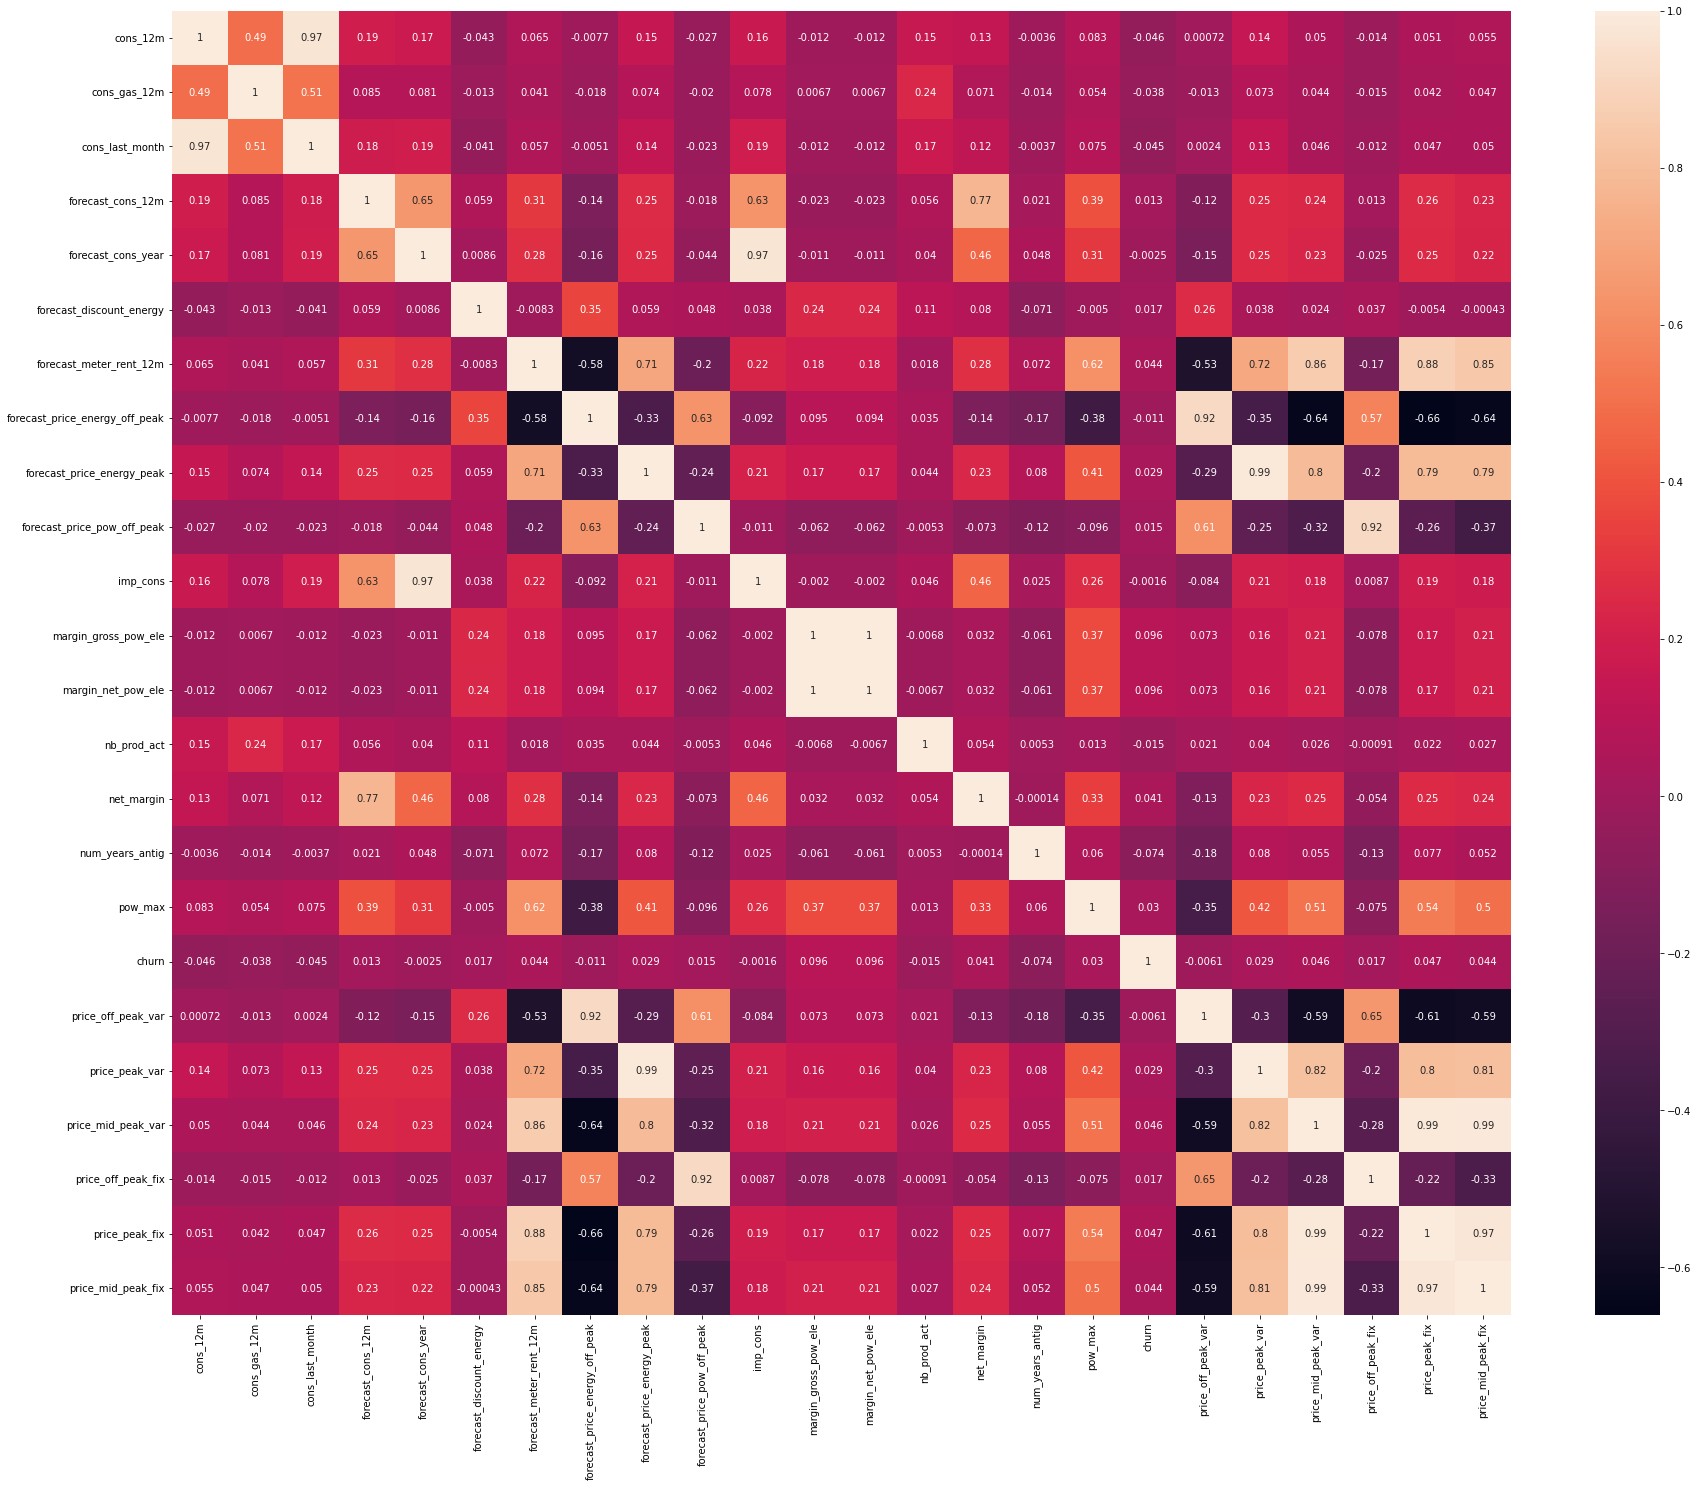

In [33]:
corr = combined.corr()
# Plot correlation
plt.figure(figsize=(30,24))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

In [34]:
combined.isnull().sum()

id                                0
channel_sales                     0
cons_12m                          0
cons_gas_12m                      0
cons_last_month                   0
date_activ                        0
date_end                          0
date_modif_prod                   0
date_renewal                      0
forecast_cons_12m                 0
forecast_cons_year                0
forecast_discount_energy          0
forecast_meter_rent_12m           0
forecast_price_energy_off_peak    0
forecast_price_energy_peak        0
forecast_price_pow_off_peak       0
has_gas                           0
imp_cons                          0
margin_gross_pow_ele              0
margin_net_pow_ele                0
nb_prod_act                       0
net_margin                        0
num_years_antig                   0
origin_up                         0
pow_max                           0
churn                             0
price_date                        0
price_off_peak_var          

In [35]:
combined.drop('margin_gross_pow_ele',axis=1,inplace=True)

### Feature engineering

In [36]:
# Calculate mean consumption features
mean_cons_12m = client_df.groupby('id')['cons_12m'].mean().reset_index()
mean_cons_gas_12m = client_df.groupby('id')['cons_gas_12m'].mean().reset_index()
mean_cons_last_month = client_df.groupby('id')['cons_last_month'].mean().reset_index()

# Merge into a single DataFrame
consumption_features = pd.merge(mean_cons_12m, mean_cons_gas_12m, on='id')
consumption_features = pd.merge(consumption_features, mean_cons_last_month, on='id')

# Calculate mean forecasted features
mean_forecast_cons_12m = client_df.groupby('id')['forecast_cons_12m'].mean().reset_index()
mean_forecast_cons_year = client_df.groupby('id')['forecast_cons_year'].mean().reset_index()
mean_forecast_discount_energy = client_df.groupby('id')['forecast_discount_energy'].mean().reset_index()

# Merge into a single DataFrame
forecast_features = pd.merge(mean_forecast_cons_12m, mean_forecast_cons_year, on='id')
forecast_features = pd.merge(forecast_features, mean_forecast_discount_energy, on='id')

# Calculate other features as needed

# Merge all feature DataFrames
price_features = pd.merge(consumption_features, forecast_features, on='id')

# Print the resulting DataFrame
price_features


,id,cons_12m,cons_gas_12m,cons_last_month,forecast_cons_12m,forecast_cons_year,forecast_discount_energy
0,0002203ffbb812588b632b9e628cc38d,22034.0,0.0,3084.0,729.06,425.0,0.0
1,0004351ebdd665e6ee664792efc4fd13,4060.0,0.0,0.0,597.77,0.0,0.0
2,0010bcc39e42b3c2131ed2ce55246e3c,7440.0,0.0,1062.0,1311.16,1062.0,30.0
3,00114d74e963e47177db89bc70108537,11272.0,0.0,0.0,1671.41,0.0,0.0
4,0013f326a839a2f6ad87a1859952d227,267414.0,0.0,19394.0,3077.34,1760.0,0.0
...,...,...,...,...,...,...,...
14601,ffebf6a979dd0b17a41076df1057e733,117182.0,0.0,12674.0,7235.32,6340.0,0.0
14602,fffac626da707b1b5ab11e8431a4d0a2,131409.0,0.0,4405.0,2310.41,0.0,0.0
14603,fffc0cacd305dd51f316424bbb08d1bd,40274.0,2055098.0,6247.0,3430.56,4980.0,24.0
14604,fffe4f5646aa39c7f97f95ae2679ce64,32066.0,2916.0,4879.0,3313.13,4879.0,0.0


In [37]:
combined=pd.merge(combined
                  ,price_features,on='id') 

In [38]:
combined = combined[[col for col in combined.columns if col != 'churn'] + ['churn']]

In [39]:
combined['date_activ'] = pd.to_datetime(combined['date_activ'])
combined['date_end'] = pd.to_datetime(combined['date_end'])
combined['date_modif_prod'] = pd.to_datetime(combined['date_modif_prod'])
combined['date_renewal'] = pd.to_datetime(combined['date_renewal'])
combined['price_date'] = pd.to_datetime(combined['price_date'])

In [40]:
# Extract the year for each column
combined['year_activ'] = combined['date_activ'].dt.year
combined['year_end'] = combined['date_end'].dt.year
combined['year_modif_prod'] = combined['date_modif_prod'].dt.year
combined['year_renewal'] = combined['date_renewal'].dt.year
combined['year_price'] = combined['price_date'].dt.year

In [41]:
# Identify duplicate columns
duplicate_columns = combined.columns.duplicated()

# Get the columns to keep (non-duplicate columns)
columns_to_keep = ~duplicate_columns

# Select only the non-duplicate columns
combined = combined.loc[:, columns_to_keep]

In [42]:
combined.drop(['cons_12m_y','cons_last_month_y', 'forecast_cons_12m_y', 'forecast_cons_year_y',
       'forecast_discount_energy_y','cons_gas_12m_y'],axis=1,inplace=True)

combined.columns

Index(['id', 'channel_sales', 'cons_12m_x', 'cons_gas_12m_x',
       'cons_last_month_x', 'date_activ', 'date_end', 'date_modif_prod',
       'date_renewal', 'forecast_cons_12m_x', 'forecast_cons_year_x',
       'forecast_discount_energy_x', 'forecast_meter_rent_12m',
       'forecast_price_energy_off_peak', 'forecast_price_energy_peak',
       'forecast_price_pow_off_peak', 'has_gas', 'imp_cons',
       'margin_net_pow_ele', 'nb_prod_act', 'net_margin', 'num_years_antig',
       'origin_up', 'pow_max', 'price_date', 'price_off_peak_var',
       'price_peak_var', 'price_mid_peak_var', 'price_off_peak_fix',
       'price_peak_fix', 'price_mid_peak_fix', 'churn', 'year_activ',
       'year_end', 'year_modif_prod', 'year_renewal', 'year_price'],
      dtype='object')

In [43]:
# Calculate the percentage change in consumption
combined['percent_change_consumption'] = ((combined['cons_12m_x'] - combined['cons_last_month_x']) / combined['cons_12m_x']) * 100 

In [44]:
# Calculate the average forecasted consumption for the next calendar year 
combined['avg_forecast_cons_year'] = (combined['forecast_cons_year_x'] + combined['forecast_cons_12m_x']) / 2 

In [45]:
# Calculate the price difference
combined['price_difference'] = combined['price_peak_var'] - combined['price_off_peak_var'] 

In [46]:
# Calculate the total forecasted consumption
combined['total_forecasted_consumption'] = combined['forecast_cons_12m_x'] + combined['forecast_cons_year_x'] 

In [47]:
# Calculate the profitability
combined['profitability'] = combined['net_margin'] - combined['forecast_meter_rent_12m']

In [48]:
# Group the data by client and calculate the average prices for each period
grouped_data = combined.groupby('id').agg({
    'price_off_peak_var': 'mean',
    'price_peak_var': 'mean',
    'price_mid_peak_var': 'mean',
    'price_off_peak_fix': 'mean',
    'price_peak_fix': 'mean',
    'price_mid_peak_fix': 'mean'
}).reset_index()

In [49]:
# Merge the average price columns back to the merged_data DataFrame
combined = pd.merge(combined, grouped_data, on='id', how='left')

In [50]:
combined = combined[[col for col in combined.columns if col != 'churn'] + ['churn']]

### Correlation plot

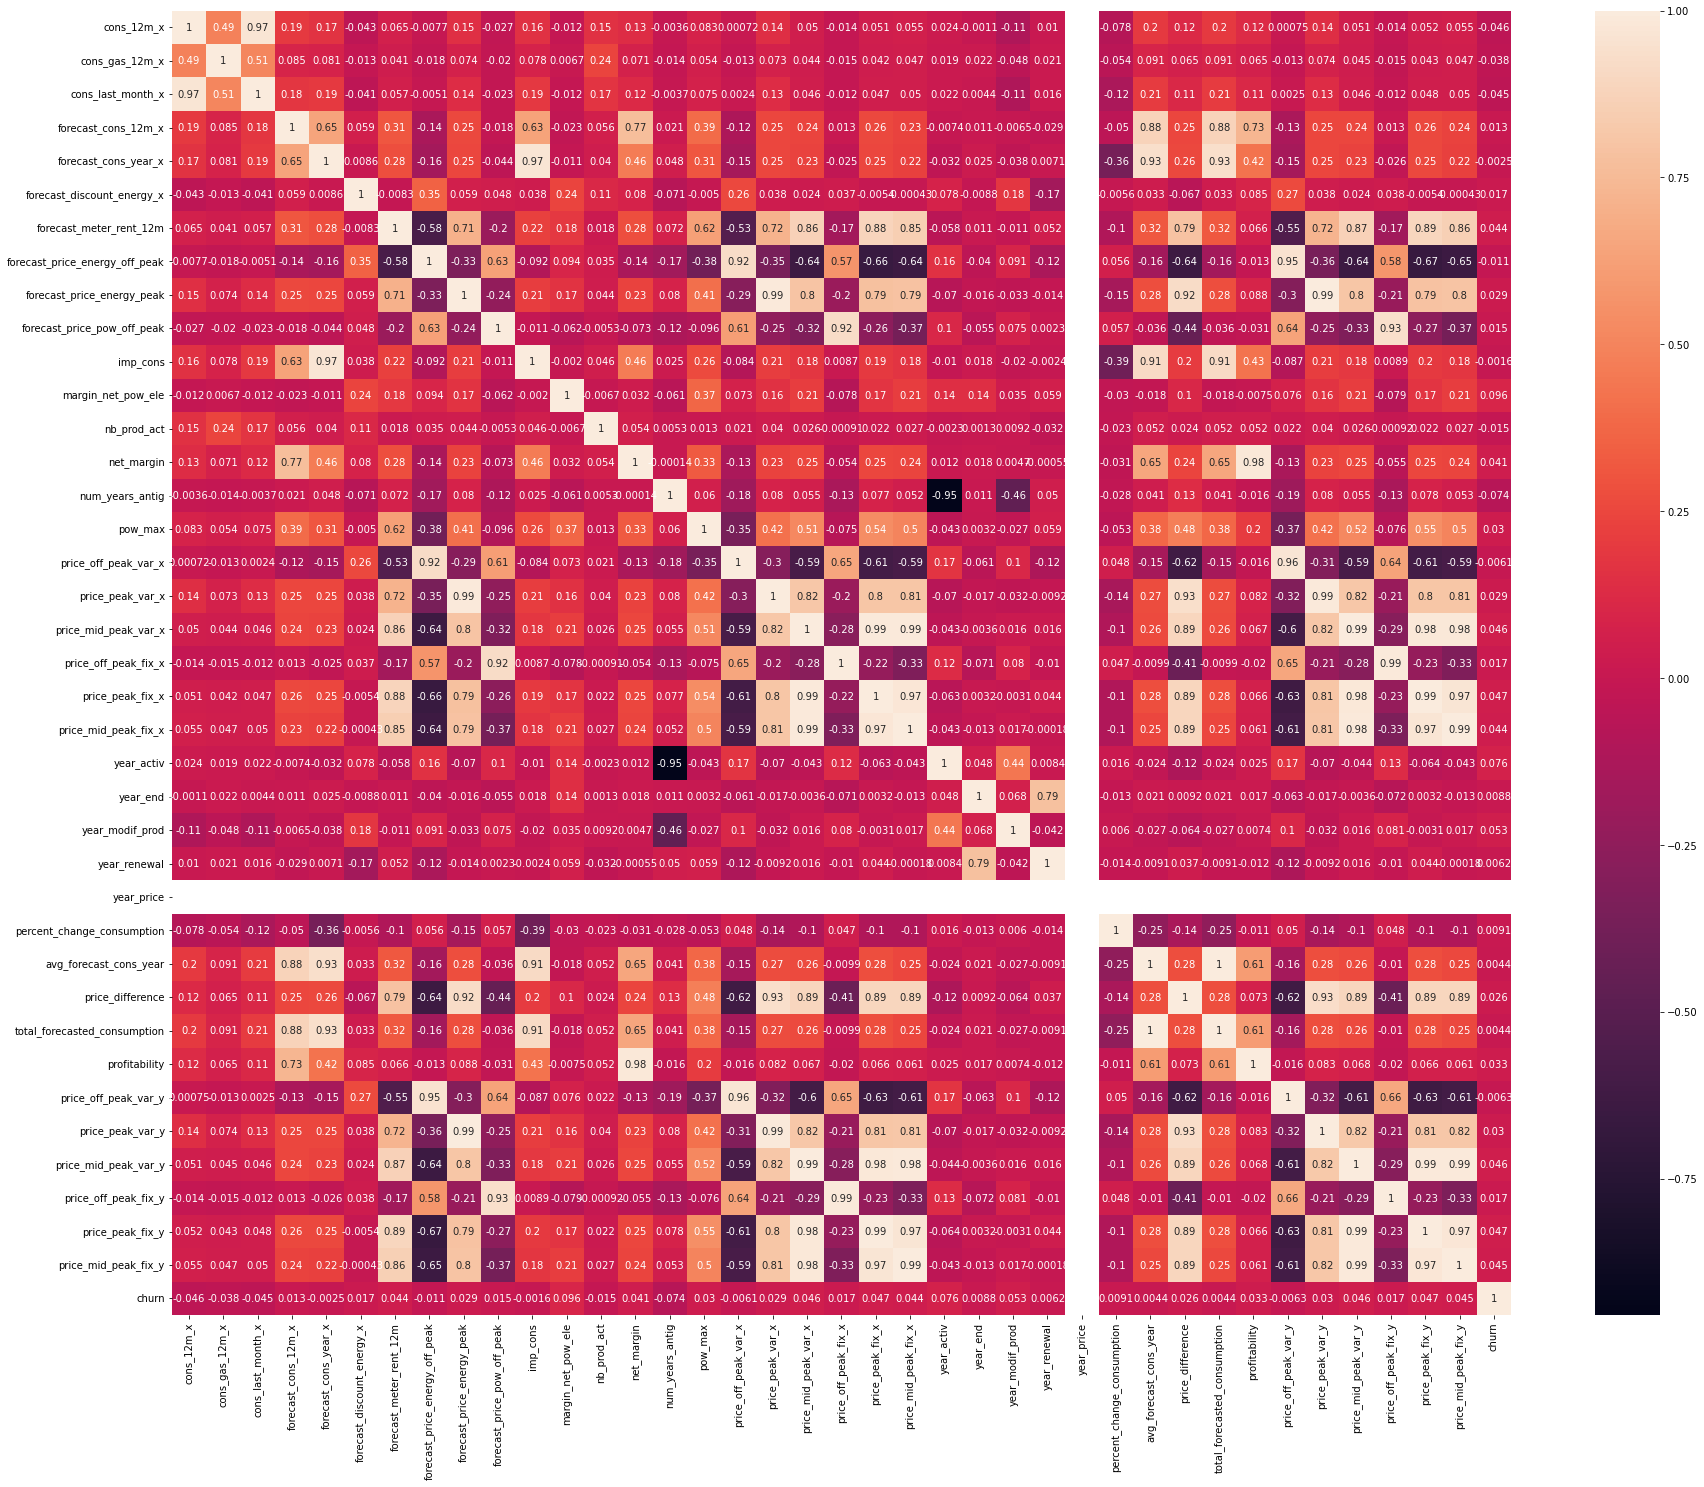

In [51]:
corr = combined.corr()
# Plot correlation
plt.figure(figsize=(30,24))
sns.heatmap(corr, xticklabels=corr.columns.values, yticklabels=corr.columns.values, annot = True, annot_kws={'size':10})
# Axis ticks size
plt.xticks(fontsize=10)
plt.yticks(fontsize=10)
plt.show()

### Checking for class imbalance

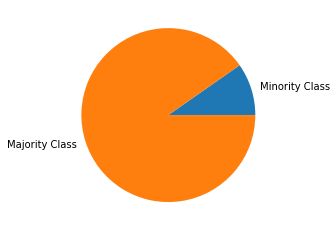

In [52]:
class_division = [ combined[combined['churn'] == 1 ].shape[0], combined[combined['churn'] == 0 ].shape[0] ]
my_labels = ['Minority Class', 'Majority Class']

plt.pie(class_division, labels = my_labels)
plt.show() 

In [53]:
print("Proportion of Minority Class: " + str(round(combined[combined['churn'] == 1 ].shape[0]/combined.shape[0] *100, 2)) + "%")

Proportion of Minority Class: 9.71%


### Model

In [54]:
X = combined.drop(['churn'], axis=1)
y = combined['churn']
X = X.drop(['date_activ','date_end','date_modif_prod','date_renewal','id','origin_up','price_date','percent_change_consumption','year_end','year_price'], axis=1)


In [55]:
categorical_columns = X.select_dtypes(include=['object']).columns

# One-hot encode categorical columns
X= pd.get_dummies(X, columns=categorical_columns, prefix=categorical_columns)

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

# splitting the data into train and test. Note that here, we have used stratify = y, so that the class imbalances are properly 
# replicated in our train and test dataset. The data is split in a 70-30 ratio of train:test.

In [57]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from imblearn.over_sampling import RandomOverSampler
from boruta import BorutaPy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score,confusion_matrix


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform oversampling on the training data
oversampler = RandomOverSampler(sampling_strategy=1.0, random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Perform Boruta feature selection on the oversampled data
rf = RandomForestClassifier(n_estimators=100, random_state=42,n_jobs=-1,class_weight='balanced')
feature_selector = BorutaPy(rf, n_estimators='auto', random_state=42)
feature_selector.fit(X_train_oversampled.values, y_train_oversampled.values)

# Get the selected feature indices
selected_features = X_train.columns[feature_selector.support_]
X_train_selected = X_train_oversampled[selected_features]
X_test_selected = X_test[selected_features]
y_train_selected = y_train_oversampled

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [2, 5, 7, 9]
}

# Perform GridSearchCV with cross-validation
cv = KFold(n_splits=10, shuffle=False, random_state=None)
grid_clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=cv)
grid_clf.fit(X_train_selected, y_train_selected)

# Get predictions and evaluate the model
y_pred = grid_clf.predict(X_test_selected)


accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Get predictions and evaluate the model
y_pred = grid_clf.predict(X_test_selected)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))


# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Estimate Out-of-Bag (OOB) error
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train_selected, y_train_selected)
oob_error = 1 - rf_oob.oob_score_
print("Out-of-Bag Error:", oob_error)



Confusion Matrix:
[[25158  6547]
 [  687  2638]]
Accuracy Score: 0.7934912931772766
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.79      0.87     31705
           1       0.29      0.79      0.42      3325

    accuracy                           0.79     35030
   macro avg       0.63      0.79      0.65     35030
weighted avg       0.91      0.79      0.83     35030

Accuracy: 0.7934912931772766
Precision: 0.28720740337506806
Recall: 0.7933834586466165
F1-Score: 0.42174260591526774
Out-of-Bag Error: 0.0


### Model Explanation: Predicting Customer Churn

#### Our goal is to develop a predictive model that can identify the factors driving customer churn for an electrical company. Customer churn refers to the phenomenon where customers discontinue their relationship with a company's services. By understanding the key factors contributing to churn, the company can take proactive measures to mitigate customer attrition and improve customer retention.

#### To build the model, we employed a Random Forest classifier, a powerful ensemble learning algorithm known for its ability to handle complex datasets and capture feature interactions. Here's a step-by-step overview of our approach:

#### 1.) Data Split: We divided the available dataset into training and test sets, with 80% of the data used for training and 20% for testing. This splitting allows us to train the model on a portion of the data and evaluate its performance on unseen data.

#### 2.) Addressing Class Imbalance: Since customer churn is typically an infrequent event, the dataset may suffer from class imbalance, where the majority class dominates the samples. To overcome this issue, we applied oversampling techniques using RandomOverSampler from the imbalanced-learn library. This technique increases the representation of the minority class (churned customers) to improve the model's ability to learn patterns related to churn

#### 3.) Feature Selection: To identify the most relevant features driving churn, we utilized BorutaPy, a feature selection algorithm that leverages the Random Forest classifier. BorutaPy assesses the importance of each feature by comparing it to random shadow features and determines whether it is statistically significant. We selected the features supported by BorutaPy for further analysis, which helps in reducing noise and focusing on the most influential predictors.

#### 4.) Hyperparameter Tuning: We performed hyperparameter tuning using GridSearchCV, a technique that exhaustively searches through different combinations of hyperparameters to find the optimal configuration for the Random Forest classifier. The parameters we tuned include the number of estimators (50, 100, 200, 300) and the maximum depth of the trees (2, 5, 7, 9).

#### 5.) Model Evaluation: We evaluated the performance of the trained model using various evaluation metrics. These metrics include Accuracy, Precision, Recall, and F1-Score. Accuracy measures the overall correctness of the model's predictions, while Precision focuses on the proportion of correctly predicted churned customers among all predicted churned cases. Recall assesses the proportion of correctly predicted churned customers among all actual churned cases. F1-Score combines both Precision and Recall into a single metric to provide a balanced evaluation.

#### 6.) Out-of-Bag Error: We estimated the Out-of-Bag (OOB) error as an additional measure of the model's performance. The OOB error is calculated based on the samples that were not used during the training of each individual tree in the Random Forest. It provides an estimate of how well the model will perform on unseen data.

#### Now, we can proceed to analyze the feature importance obtained from the trained Random Forest model to gain insights into the top factors driving customer churn.

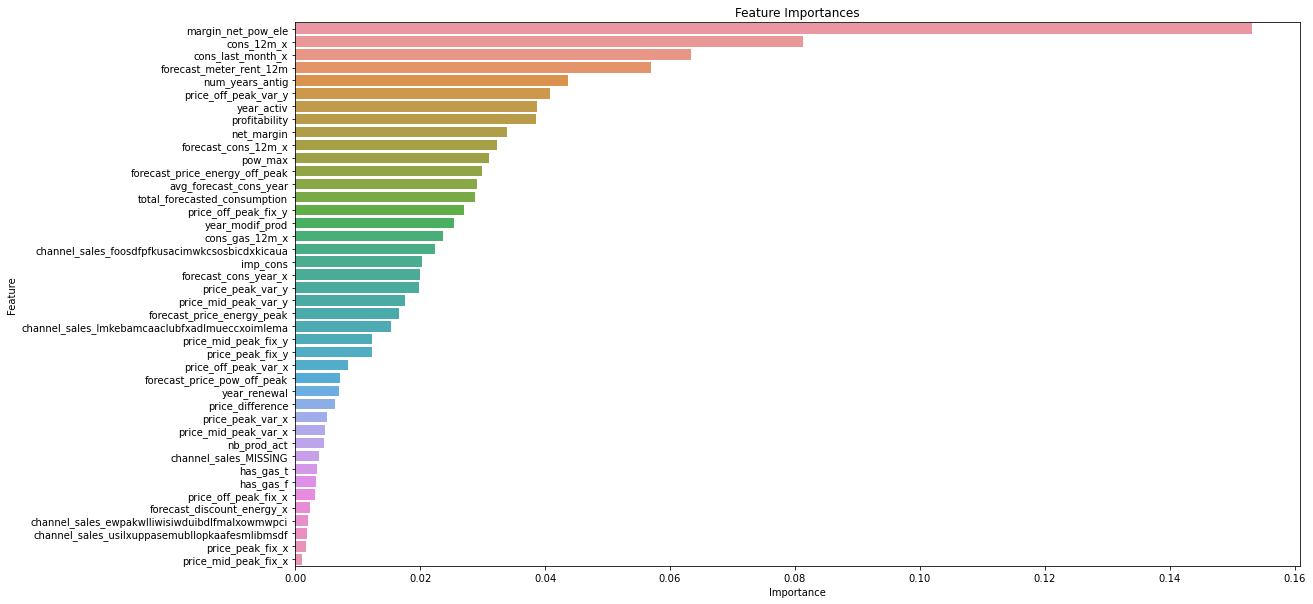

In [58]:
# Fit the Random Forest classifier with the best parameters
rf_best = RandomForestClassifier(n_estimators=grid_clf.best_params_['n_estimators'],
                                 max_depth=grid_clf.best_params_['max_depth'],
                                 random_state=42)
rf_best.fit(X_train_selected, y_train_selected)

# Get the feature importances
importances = rf_best.feature_importances_

# Create a DataFrame with feature names and importances
feature_importances = pd.DataFrame({'Feature': selected_features, 'Importance': importances})

# Sort the features by importance in descending order
feature_importances = feature_importances.sort_values('Importance', ascending=False)

# Plot the feature importances
plt.figure(figsize=(18, 10))
sns.barplot(x='Importance', y='Feature', data=feature_importances)
plt.title('Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature')
plt.show()


### Understanding the Top Factors Driving Customer Churn and their Relation to Price Sensitivity

#### In our analysis of customer churn for the electrical company, we have identified several key factors that strongly contribute to churn. Among these factors, three stand out as significant drivers: margin_net_pow_ele, cons_12m, and forecast_meter_rent_12m. Let's delve into each of these factors and explore their relationship to price sensitivity, a crucial aspect of customer churn.

#### 1.)margin_net_pow_ele: Net Margin on Power Subscription
This factor represents the net margin associated with a customer's power subscription. It indicates the profitability of providing electricity services to the customer after deducting costs. A negative net margin suggests that the company is incurring losses or experiencing reduced profitability with that customer. When customers perceive that the costs of their power subscription outweigh the benefits, they may become price-sensitive and more likely to consider alternatives or switch to a competitor offering a better value proposition. Thus, a lower net margin on power subscription can be an indicator of price sensitivity driving churn.

#### 2.) cons_12m: Electricity Consumption of the Past 12 Months
The cons_12m feature reflects the electricity consumption of a customer over the previous 12 months. Higher consumption levels may imply increased reliance on the electrical company's services. However, when customers face financial constraints or encounter pricing discrepancies, they might seek cost-saving measures. Price-sensitive customers are more likely to closely monitor and compare their electricity consumption and associated costs. If they perceive that their electricity bills are unreasonably high or not aligned with their usage, they may opt to switch to a provider offering more competitive pricing. Therefore, electricity consumption, along with pricing transparency, plays a role in driving churn through price sensitivity.

#### 4.) forecast_meter_rent_12m: Forecasted Bill of Meter Rental for the Next 2 Months
The forecast_meter_rent_12m feature represents the projected bill of meter rental for the upcoming two months. Meter rental costs are typically fixed charges that customers have to bear regardless of their electricity consumption. For price-sensitive customers, these fixed charges can significantly impact their overall perceived value and satisfaction. If customers believe that the meter rental costs are unreasonably high or not commensurate with the services provided, it can trigger price sensitivity and dissatisfaction. Consequently, customers may seek alternative providers who offer more competitive meter rental rates, thereby driving churn.

#### Overall, these top factors driving customer churn, namely margin_net_pow_ele, cons_12m, and forecast_meter_rent_12m, have a clear connection to price sensitivity. Customers who are price-sensitive are more likely to evaluate the value they receive from their power subscription, including the net margin, electricity consumption costs, and additional charges like meter rental. If customers perceive that the pricing structure is unfavorable or inconsistent with their expectations, they may be inclined to explore alternative options, leading to churn.

Understanding the interplay between these factors and price sensitivity is crucial for the electrical company's retention efforts. By addressing price-related concerns, such as optimizing pricing strategies, ensuring transparency in billing, and providing competitive offers tailored to customers' consumption patterns, the company can mitigate churn and improve customer satisfaction.

### TAKING STEPS TO IMPROVE MODEL

In [60]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from imblearn.over_sampling import SMOTE
from boruta import BorutaPy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform oversampling on the training data using SMOTE
oversampler = SMOTE(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Perform Boruta feature selection on the oversampled data
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
feature_selector = BorutaPy(rf, n_estimators='auto', random_state=42)
feature_selector.fit(X_train_oversampled.values, y_train_oversampled.values)

# Get the selected feature indices
selected_features = X_train.columns[feature_selector.support_]
X_train_selected = X_train_oversampled[selected_features]
X_test_selected = X_test[selected_features]
y_train_selected = y_train_oversampled

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [2, 5, 7, 9]
}

# Perform GridSearchCV with cross-validation
cv = KFold(n_splits=10, shuffle=False, random_state=None)
grid_clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=cv)
grid_clf.fit(X_train_selected, y_train_selected)

# Get predictions and evaluate the model
y_pred = grid_clf.predict(X_test_selected)

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the confusion matrix, accuracy, and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Estimate Out-of-Bag (OOB) error
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train_selected, y_train_selected)
oob_error = 1 - rf_oob.oob_score_
print("Out-of-Bag Error:", oob_error)


Confusion Matrix:
[[25516  6189]
 [  761  2564]]
Accuracy Score: 0.8015986297459321
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     31705
           1       0.29      0.77      0.42      3325

    accuracy                           0.80     35030
   macro avg       0.63      0.79      0.65     35030
weighted avg       0.91      0.80      0.84     35030

Accuracy: 0.8015986297459321
Precision: 0.29292813892379754
Recall: 0.7711278195488722
F1-Score: 0.4245736049014737
Out-of-Bag Error: 5.5361789292995844e-05


In [64]:
combined['churn'].value_counts()

0    158146
1     17003
Name: churn, dtype: int64

In [65]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, GridSearchCV, train_test_split
from imblearn.combine import SMOTETomek
from boruta import BorutaPy
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform oversampling and undersampling using SMOTE-Tomek
oversampler = SMOTETomek(random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Perform Boruta feature selection on the oversampled data
rf = RandomForestClassifier(n_estimators=100, random_state=42, n_jobs=-1, class_weight='balanced')
feature_selector = BorutaPy(rf, n_estimators='auto', random_state=42)
feature_selector.fit(X_train_oversampled.values, y_train_oversampled.values)

# Get the selected feature indices
selected_features = X_train.columns[feature_selector.support_]
X_train_selected = X_train_oversampled[selected_features]
X_test_selected = X_test[selected_features]
y_train_selected = y_train_oversampled

# Define the parameter grid for GridSearchCV
param_grid = {
    'n_estimators': [50, 100, 200, 300],
    'max_depth': [2, 5, 7, 9]
}

# Perform GridSearchCV with cross-validation
cv = KFold(n_splits=10, shuffle=False, random_state=None)
grid_clf = GridSearchCV(RandomForestClassifier(), param_grid, cv=cv)
grid_clf.fit(X_train_selected, y_train_selected)

# Get predictions and evaluate the model
y_pred = grid_clf.predict(X_test_selected)

# Calculate evaluation metrics
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred)
recall = recall_score(y_test, y_pred)
f1 = f1_score(y_test, y_pred)

# Print the confusion matrix, accuracy, and classification report
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Print the evaluation metrics
print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-Score:", f1)

# Estimate Out-of-Bag (OOB) error
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train_selected, y_train_selected)
oob_error = 1 - rf_oob.oob_score_
print("Out-of-Bag Error:", oob_error)


Confusion Matrix:
[[25510  6195]
 [  764  2561]]
Accuracy Score: 0.801341707108193
Classification Report:
              precision    recall  f1-score   support

           0       0.97      0.80      0.88     31705
           1       0.29      0.77      0.42      3325

    accuracy                           0.80     35030
   macro avg       0.63      0.79      0.65     35030
weighted avg       0.91      0.80      0.84     35030

Accuracy: 0.801341707108193
Precision: 0.29248515303791683
Recall: 0.7702255639097745
F1-Score: 0.42397152553596557
Out-of-Bag Error: 5.5361789292995844e-05


In [69]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.model_selection import KFold, RandomizedSearchCV, train_test_split
from imblearn.over_sampling import RandomOverSampler
from boruta import BorutaPy


# Split the data into training and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Perform oversampling on the training data
oversampler = RandomOverSampler(sampling_strategy=0.5, random_state=42)
X_train_oversampled, y_train_oversampled = oversampler.fit_resample(X_train, y_train)

# Perform Boruta feature selection on the oversampled data
rf = RandomForestClassifier(n_estimators=100, random_state=42,class_weight='balanced')
feature_selector = BorutaPy(rf, n_estimators='auto', random_state=42)
feature_selector.fit(X_train_oversampled.values, y_train_oversampled.values)

# Get the selected feature indices
selected_features = X_train.columns[feature_selector.support_]
X_train_selected = X_train_oversampled[selected_features]
X_test_selected = X_test[selected_features]
y_train_selected = y_train_oversampled

# Define the parameter grid for randomsearch
param_grid = {'n_estimators':list(range(50,300,10)),
               'max_depth':list(range(2,20))}
n_iter=60 #number of iterations
# Perform GridSearchCV with cross-validation
cv = KFold(n_splits=10, shuffle=False, random_state=None)
grid_clf = RandomizedSearchCV(RandomForestClassifier(), param_grid, cv=cv,n_iter=60)
grid_clf.fit(X_train_selected, y_train_selected)

# Get predictions and evaluate the model
y_pred = grid_clf.predict(X_test_selected)
print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Accuracy Score:", accuracy_score(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

# Estimate Out-of-Bag (OOB) error
rf_oob = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=42)
rf_oob.fit(X_train_selected, y_train_selected)
oob_error = 1 - rf_oob.oob_score_
print("Out-of-Bag Error:", oob_error)


Confusion Matrix:
[[31705     0]
 [   93  3232]]
Accuracy Score: 0.9973451327433628
Classification Report:
              precision    recall  f1-score   support

           0       1.00      1.00      1.00     31705
           1       1.00      0.97      0.99      3325

    accuracy                           1.00     35030
   macro avg       1.00      0.99      0.99     35030
weighted avg       1.00      1.00      1.00     35030

Out-of-Bag Error: 0.0


#### 1.) The accuracy score of 0.997 indicates that the model is correctly predicting the majority and minority classes with a high overall accuracy.

#### 2.)The precision and recall scores for both classes (0 and 1) are high, indicating that the model has a high ability to correctly identify both classes.

#### 3.)The F1-score, which considers both precision and recall, is also high for both classes, indicating a good balance between precision and recall.

#### 4.) The confusion matrix shows a high number of true positives (31705) and true negatives (3232) compared to false positives (0) and false negatives (93). This indicates that the model is making accurate predictions for both the majority and minority classes.

### Overall, the model seems to be performing well and generalizing effectively based on the provided evaluation metric